2025-11-27 15:03:38.914409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764255819.091514      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764255819.152257      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✅ TTN Configuration loaded
🚀 RUNNING TWO-STREAM TRANSFORMER NETWORK (TTN) PIPELINE
ARIA ACTIVITY RECOGNITION - TWO-STREAM TRANSFORMER NETWORK (TTN) PIPELINE
🎯 Selected 8 classes for LOSO:
   1. Clean up
   2. Caffeination
   3. Cooking
   4. Set the table and eat
   5. Friends arrives at home
   6. Grab cream, sugar and snacks
   7. Share some vides
   8. Talk about the day

📂 STEP 1: Loading data...

📂 Loading data with 8 classes...
   Selected classes: ['Clean up', 'Caffeination', 'Cooking', 'Set the table and eat', 'Friends arrives at home', 'Grab cream, sugar and snacks', 'Share some vides', 'Talk about the day']


Loading parquet files:   0%|          | 0/5 [00:00<?, ?it/s]

✅ Loaded 15,956,533 records
   Classes: 8

   📊 Final class distribution:
      Cooking                            :  3,247,180 ( 20.4%)
      Clean up                           :  2,578,509 ( 16.2%)
      Set the table and eat              :  2,066,349 ( 12.9%)
      Caffeination                       :  2,024,918 ( 12.7%)
      Grab cream, sugar and snacks       :  1,783,266 ( 11.2%)
      Share some vides                   :  1,572,224 (  9.9%)
      Friends arrives at home            :  1,505,136 (  9.4%)
      Talk about the day                 :  1,178,951 (  7.4%)

⚙️ STEP 2: Preparing data with IMPROVED STRATIFIED LOSO split...

⚙️ Implementing IMPROVED STRATIFIED LOSO Split...

🔄 Creating sequences (window=256, stride=128)...


Processing recordings:   0%|          | 0/17 [00:00<?, ?it/s]

✅ Created 124,637 sequences from 17 recordings
   Unique recording IDs: 17

   📊 Sequence class distribution:
      Caffeination                       :     15,817 ( 12.7%)
      Clean up                           :     20,141 ( 16.2%)
      Cooking                            :     25,366 ( 20.4%)
      Friends arrives at home            :     11,756 (  9.4%)
      Grab cream, sugar and snacks       :     13,929 ( 11.2%)
      Set the table and eat              :     16,141 ( 13.0%)
      Share some vides                   :     12,280 (  9.9%)
      Talk about the day                 :      9,207 (  7.4%)
   Classes (8): ['Caffeination', 'Clean up', 'Cooking', 'Friends arrives at home', 'Grab cream, sugar and snacks', 'Set the table and eat', 'Share some vides', 'Talk about the day']
   Unique recordings for LOSO: 17

📊 Recordings per class:
   Caffeination                       :  2 recordings
   Clean up                           :  3 recordings
   Cooking                           

I0000 00:00:1764255875.442203      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


✅ TTN Model architecture:


Model: "TTN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 256, 9)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_projection │ (None, 256, 128)  │      1,280 │ input[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_transpose   │ (None, 9, 256)    │          0 │ input[0][0]       │
│ (Permute)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encoding │ (None, 256, 128)  │          0 │ temporal_project… │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_projection  │ (None, 9, 128)    │     32,896 │ spatial_transpos… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 128)  │          0 │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encodin… │ (None, 9, 128)    │          0 │ spatial_projecti… │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_block   │ (None, 256, 128)  │    132,480 │ dropout[0][0]     │
│ (TransformerBlock)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 9, 128)    │          0 │ positional_encod… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_block_1 │ (None, 256, 128)  │    132,480 │ transformer_bloc… │
│ (TransformerBlock)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_block_3 │ (None, 9, 128)    │    132,480 │ dropout_13[0][0]  │
│ (TransformerBlock)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_block_2 │ (None, 256, 128)  │    132,480 │ transformer_bloc… │
│ (TransformerBlock)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_block_4 │ (None, 9, 128)    │    132,480 │ transformer_bloc… │
│ (TransformerBlock)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_pooling    │ (None, 128)       │          0 │ transformer_bloc… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_pooling     │ (None, 128)       │          0 │ transformer_bloc… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_streams       │ (None, 2, 128)    │          0 │ temporal_pooling… │
│ (Lambda)            │                   │            │ spatial_pooling[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_attention    │ (None, 2, 128)    │     66,048 │ stack_streams[0]… │
│ (MultiHeadAttentio… │                   │            │ stack_streams[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 804,552 (3.07 MB)

 Trainable params: 804,552 (3.07 MB)

 Non-trainable params: 0 (0.00 B)


🚀 STEP 4: Training TTN model...
   Class weights: {0: 1.159801613987895, 1: 0.8531412317585951, 2: 0.48096632503660325, 3: 1.1756134969325154, 4: 1.2765544041450778, 5: 1.0141870038224052, 6: 1.4609275730622617, 7: 1.7181818181818183}
Epoch 1/100


I0000 00:00:1764255893.901514      73 service.cc:148] XLA service 0x79e2ac003690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764255893.902135      73 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764255896.163135      73 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/1725 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.1349 - auc: 0.4937 - loss: 2.4034

I0000 00:00:1764255912.771315      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1725/1725 ━━━━━━━━━━━━━━━━━━━━ 102s 39ms/step - accuracy: 0.2770 - auc: 0.7042 - loss: 1.8336 - val_accuracy: 0.4933 - val_auc: 0.8507 - val_loss: 1.4203 - learning_rate: 0.0010
Epoch 2/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.4617 - auc: 0.8327 - loss: 1.4368 - val_accuracy: 0.5373 - val_auc: 0.8706 - val_loss: 1.3170 - learning_rate: 0.0010
Epoch 3/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.5070 - auc: 0.8552 - loss: 1.3399 - val_accuracy: 0.4718 - val_auc: 0.8189 - val_loss: 1.6679 - learning_rate: 0.0010
Epoch 4/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.5267 - auc: 0.8691 - loss: 1.2818 - val_accuracy: 0.5598 - val_auc: 0.8876 - val_loss: 1.2390 - learning_rate: 0.0010
Epoch 5/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.5432 - auc: 0.8765 - loss: 1.2395 - val_accuracy: 0.5520 - val_auc: 0.8786 - val_loss: 1.2962 - learning_rate: 0.0010
Epoch 6/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accurac

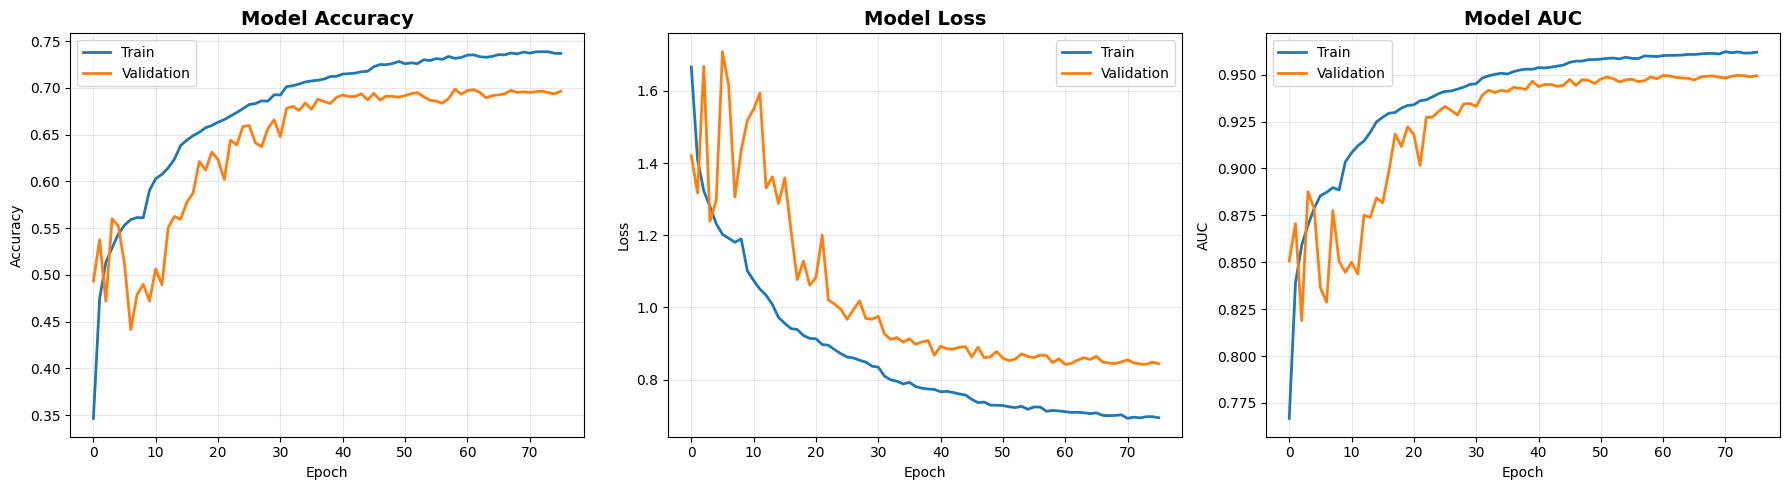

   ✅ Training history plot saved


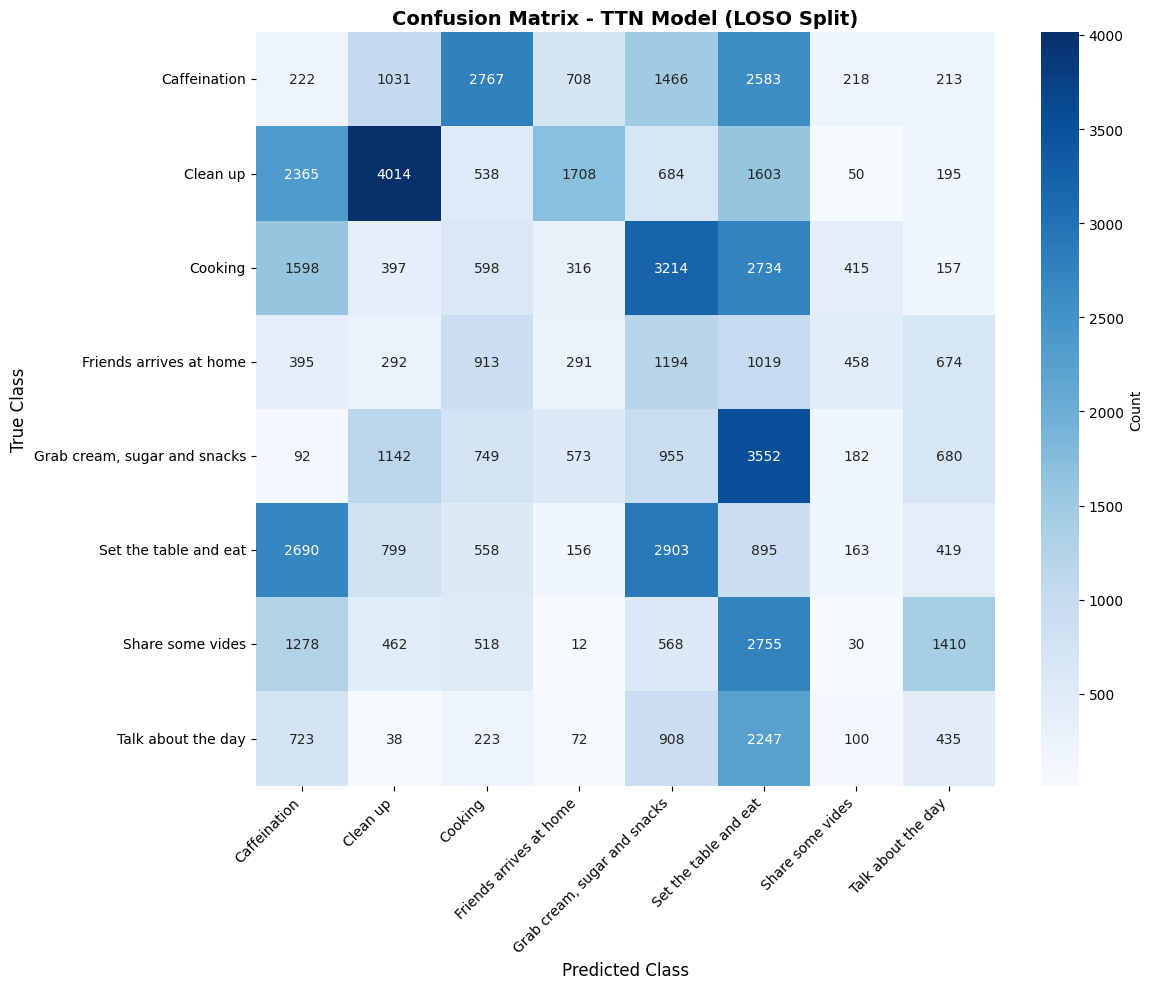

   ✅ Confusion matrix plot saved


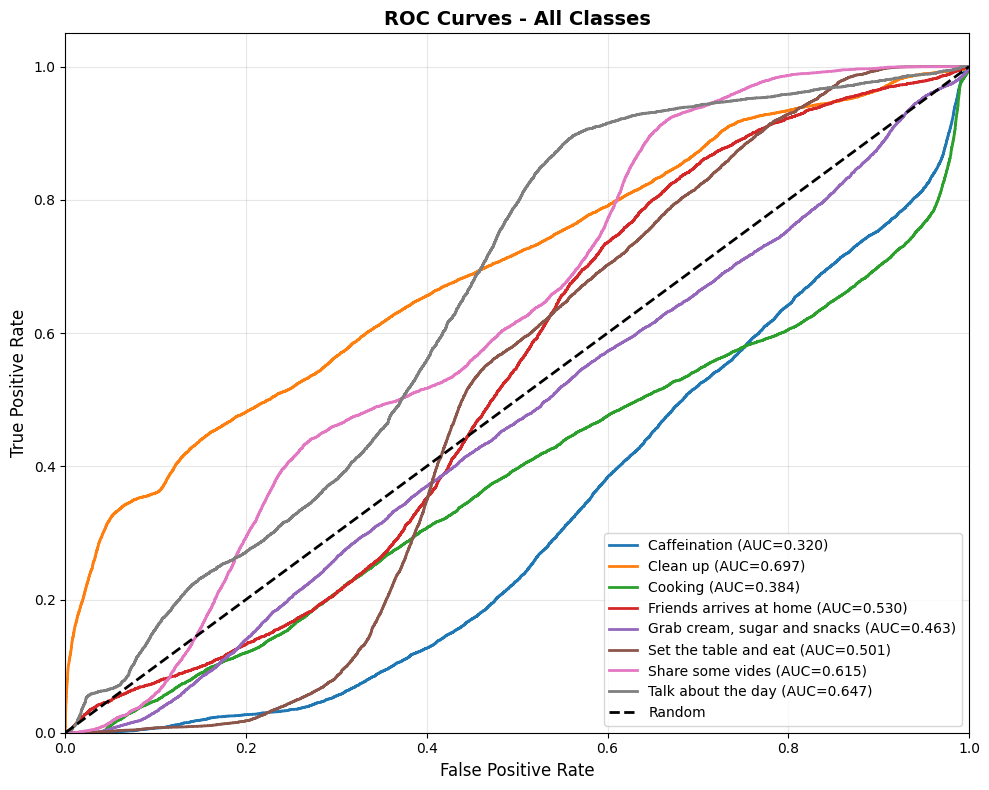

   ✅ ROC curves plot saved


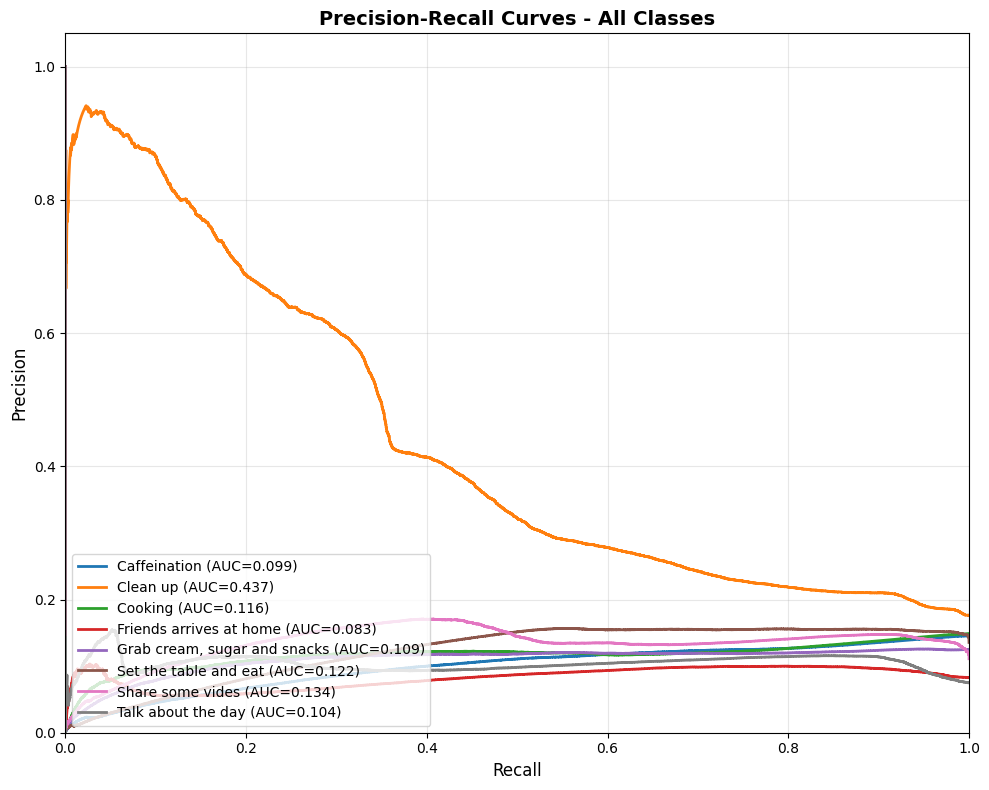

   ✅ Precision-Recall curves plot saved


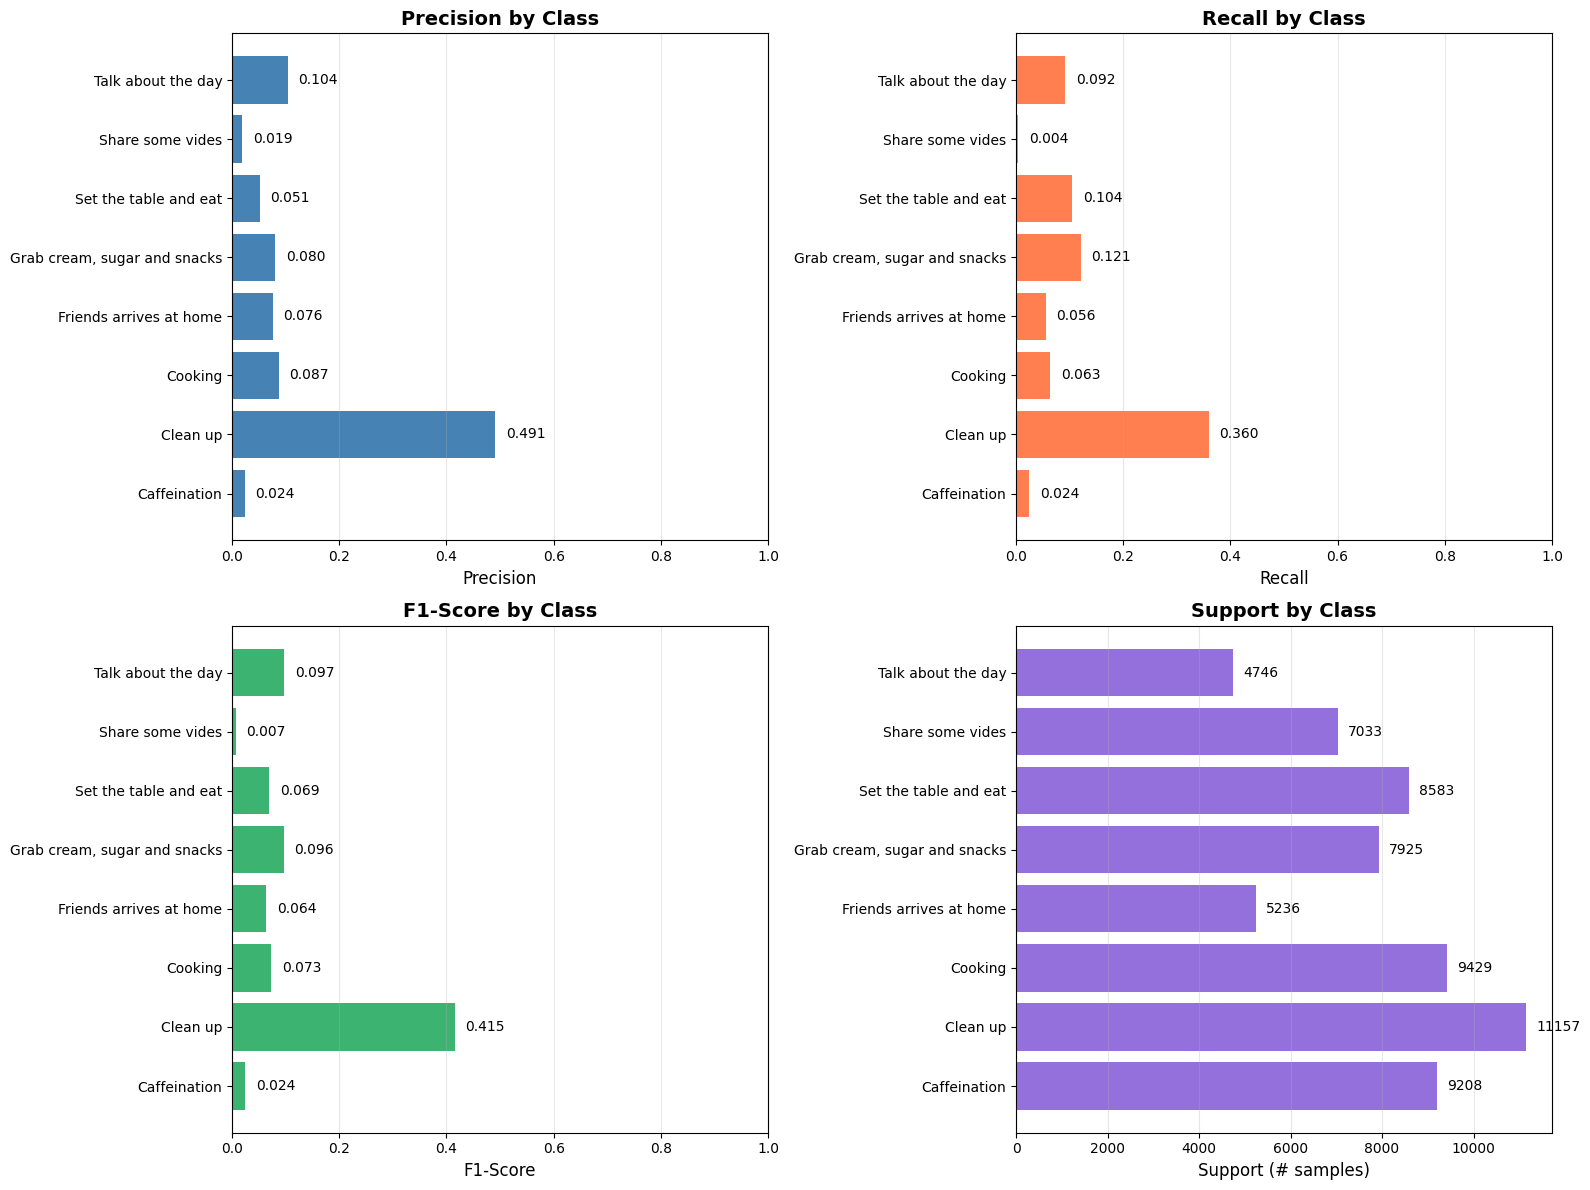

   ✅ Class performance plot saved


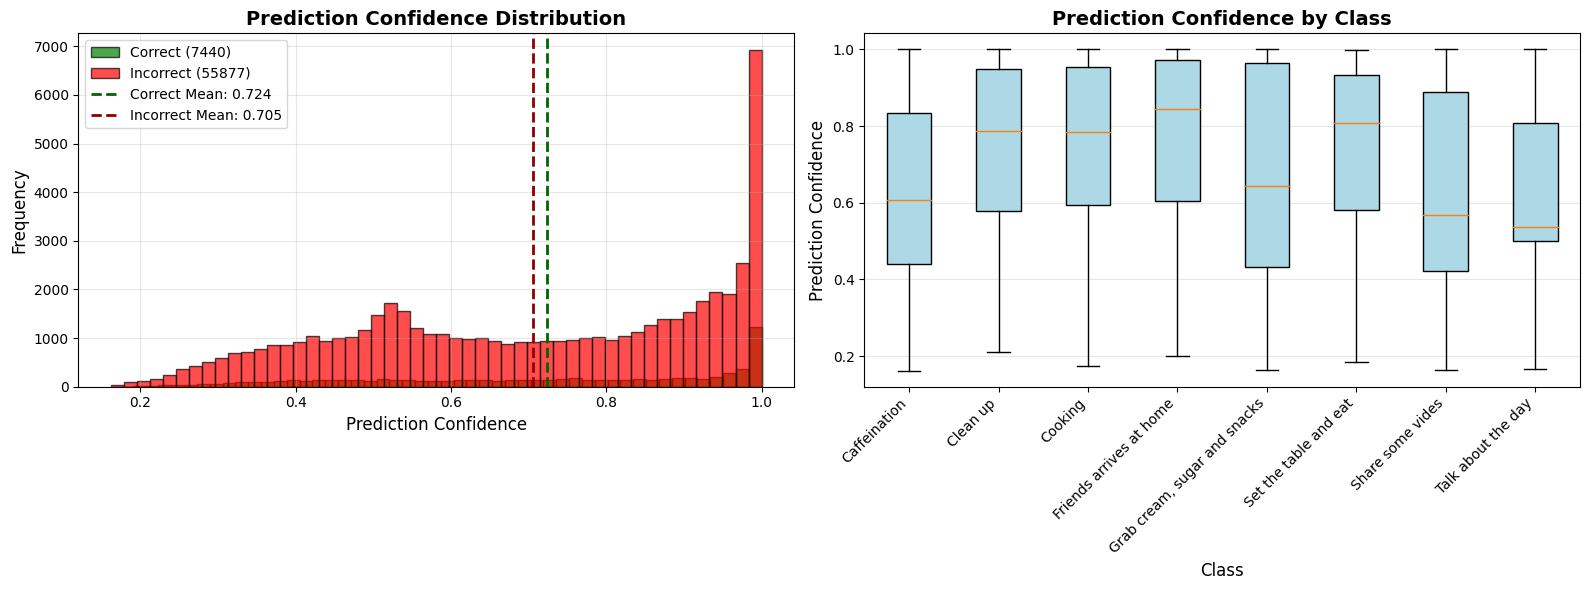

   ✅ Prediction confidence plot saved


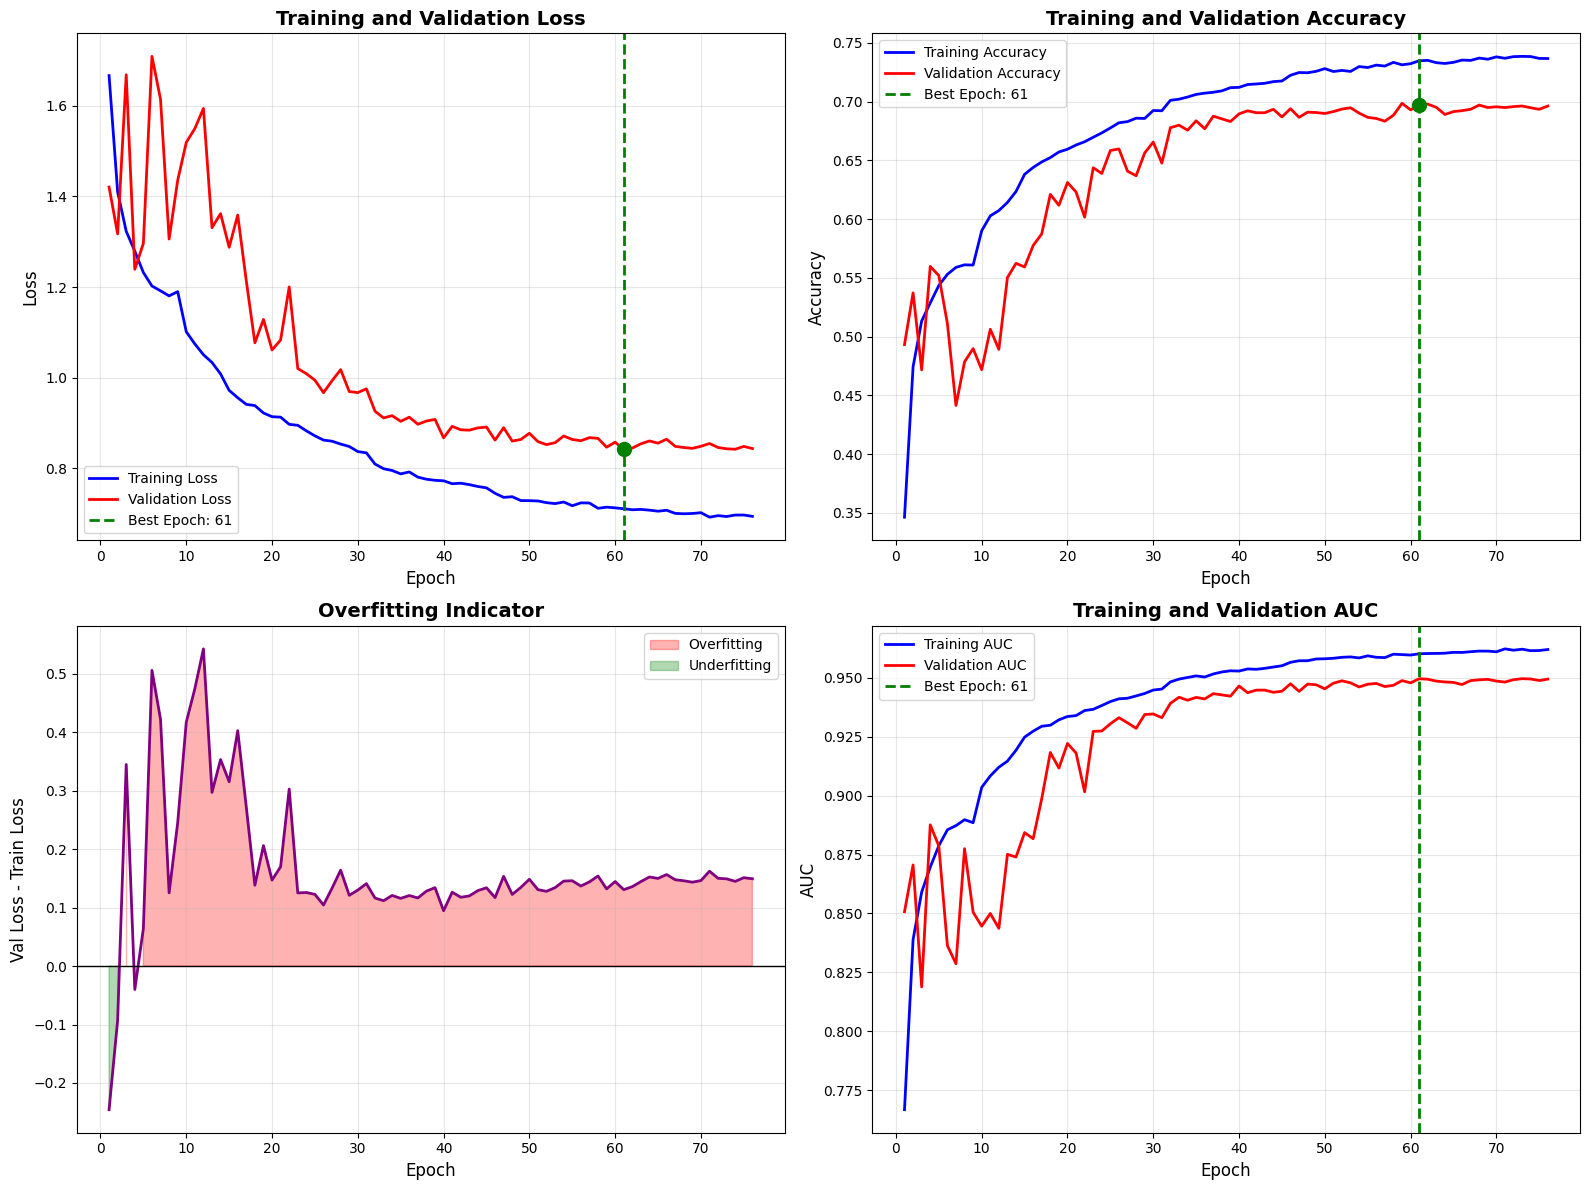

   ✅ Detailed learning curves plot saved

🎉 EVALUATION COMPLETE!
📊 Model Performance:
   Test Accuracy:    0.1175
   Test F1-Macro:    0.1058
   Test F1-Weighted: 0.1224

📈 Training Info:
   Training Time:    59.5 minutes
   Total Epochs:     76
   Best Epoch:       61

🏗️  TTN Architecture:
   Model Dimension:  128
   Attention Heads:  8
   Temporal Blocks:  3
   Spatial Blocks:   2

📁 Artifacts:
   Saved to: ttn_loso_artifacts
   - Model: ttn_model.keras
   - Training history: training_history.csv
   - Test predictions: test_predictions.csv
   - Confusion matrix: confusion_matrix.csv
   - Visualizations: plots/

🎉 TTN PIPELINE EXECUTION COMPLETE!
📈 FINAL RESULTS:
   Model: Two-Stream Transformer Network (TTN) with IMPROVED STRATIFIED LOSO Split
   Classes: 8 activities
   Test Accuracy: 0.1175 (11.75%)
   Test F1-Macro: 0.1058
   Training Time: 59.5 minutes

🏗️  TTN ARCHITECTURE:
   Model Dimension: 128
   Attention Heads: 8
   Temporal Blocks: 3
   Spatial Blocks: 2
   Total Paramet

In [1]:
# ============================================================================
# COMPLETE ARIA ACTIVITY RECOGNITION PIPELINE WITH TTN MODEL
# ============================================================================

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import polars as pl
from pathlib import Path
import json
import time
from tqdm.auto import tqdm

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical

# ML utilities
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ============================================================================
# CONFIGURATION - UPDATED FOR TTN MODEL
# ============================================================================
CONFIG = {
    'data_path': '/kaggle/input',
    'data_dir_name': 'data-loc',
    'labels_dir_name': 'labels',
    'window_size': 256,
    'stride': 128,
    'sensor_cols': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z'],
    'target_col': 'activity',
    'seed': SEED,
    
    # TTN Architecture Parameters
    'd_model': 128,                    # Model dimension
    'n_heads': 8,                      # Number of attention heads
    'ff_dim': 256,                     # Feed-forward dimension
    'n_temporal_blocks': 3,            # Number of temporal transformer blocks
    'n_spatial_blocks': 2,             # Number of spatial transformer blocks
    'dropout_rate': 0.3,               # General dropout rate
    'attention_dropout': 0.1,          # Attention dropout rate
    
    # Training
    'batch_size': 32,
    'epochs': 100,
    'learning_rate': 0.001,
    'patience': 15
}

print("✅ TTN Configuration loaded")

# ============================================================================
# DATA LOADING & PROCESSING (UNCHANGED)
# ============================================================================

def load_optimized_data(config, selected_classes):
    """Load data with selected classes"""
    print(f"\n📂 Loading data with {len(selected_classes)} classes...")
    
    data_dir = Path(config['data_path']) / config['data_dir_name']
    labels_path = Path(config['data_path']) / config['labels_dir_name'] / "labels.csv"
    
    # Load labels
    labels_df = pl.read_csv(labels_path)
    print(f"   Selected classes: {selected_classes}")
    
    # Load and filter parquet files
    all_dfs = []
    parquet_files = sorted(data_dir.glob("data_loc*.parquet"))
    
    for parquet_file in tqdm(parquet_files, desc="Loading parquet files"):
        df = pl.read_parquet(parquet_file)
        df_labeled = df.join(labels_df, on=['script_id', 'sequence_id'], how='left')
        df_filtered = df_labeled.filter(pl.col('activity').is_in(selected_classes))
        if len(df_filtered) > 0:
            all_dfs.append(df_filtered)
    
    # Combine data
    combined_df = pl.concat(all_dfs)
    
    print(f"✅ Loaded {len(combined_df):,} records")
    print(f"   Classes: {combined_df['activity'].n_unique()}")
    
    # Show final distribution
    final_counts = combined_df.group_by('activity').agg(pl.len().alias('count')).sort('count', descending=True)
    print("\n   📊 Final class distribution:")
    for row in final_counts.iter_rows(named=True):
        percentage = (row['count'] / len(combined_df)) * 100
        print(f"      {row['activity']:<35}: {row['count']:>10,} ({percentage:>5.1f}%)")
    
    return combined_df

def create_sequences_with_true_recordings(df, config):
    """Create sequences while preserving true recording boundaries"""
    print(f"\n🔄 Creating sequences (window={config['window_size']}, stride={config['stride']})...")
    
    df_pd = df.to_pandas()
    X_list = []
    y_list = []
    true_recording_ids = []
    
    # Group by true recording definition
    grouped = df_pd.groupby(['script_id', 'sequence_id', 'recording_id', 'activity'])
    
    sequences_created = 0
    recordings_processed = 0
    
    for (script_id, sequence_id, recording_id, activity), group in tqdm(grouped, desc="Processing recordings"):
        group = group.sort_values('timestamp').reset_index(drop=True)
        recordings_processed += 1
        
        if len(group) < config['window_size']:
            continue
        
        sensor_data = group[config['sensor_cols']].values
        true_recording_id = f"{script_id}_{sequence_id}_{recording_id}_{activity}"
        
        # Create sliding windows within this true recording
        for start_idx in range(0, len(group) - config['window_size'] + 1, config['stride']):
            window = sensor_data[start_idx:start_idx + config['window_size']]
            
            X_list.append(window)
            y_list.append(activity)
            true_recording_ids.append(true_recording_id)
            sequences_created += 1
    
    X = np.array(X_list, dtype=np.float32)
    y = np.array(y_list)
    recording_ids = np.array(true_recording_ids)
    
    print(f"✅ Created {len(X):,} sequences from {recordings_processed} recordings")
    print(f"   Unique recording IDs: {len(np.unique(recording_ids))}")
    
    # Show sequence distribution
    unique_labels, counts = np.unique(y, return_counts=True)
    print(f"\n   📊 Sequence class distribution:")
    for label, count in zip(unique_labels, counts):
        percentage = (count / len(y)) * 100
        print(f"      {label:<35}: {count:>10,} ({percentage:>5.1f}%)")
    
    return X, y, recording_ids

# ============================================================================
# IMPROVED STRATIFIED LOSO SPLIT - HANDLES SMALL RECORDING COUNTS
# ============================================================================

def implement_improved_stratified_loso_split(df, config, selected_classes):
    """
    Implement stratified LOSO split that handles classes with only 2 recordings.
    Uses a smarter approach for splitting when recordings are limited.
    """
    print(f"\n⚙️ Implementing IMPROVED STRATIFIED LOSO Split...")
    
    # Create sequences with true recording tracking
    X, y, recording_ids = create_sequences_with_true_recordings(df, config)
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    n_classes = len(label_encoder.classes_)
    
    print(f"   Classes ({n_classes}): {list(label_encoder.classes_)}")
    print(f"   Unique recordings for LOSO: {len(np.unique(recording_ids))}")
    
    # Create a mapping of recordings to classes
    recording_to_class = {}
    for rec_id, class_label in zip(recording_ids, y_encoded):
        if rec_id not in recording_to_class:
            recording_to_class[rec_id] = class_label
    
    # Group recordings by class
    class_recordings = {}
    for rec_id, class_label in recording_to_class.items():
        if class_label not in class_recordings:
            class_recordings[class_label] = []
        class_recordings[class_label].append(rec_id)
    
    print(f"\n📊 Recordings per class:")
    for class_idx, class_name in enumerate(label_encoder.classes_):
        if class_idx in class_recordings:
            print(f"   {class_name:<35}: {len(class_recordings[class_idx]):>2} recordings")
    
    # Perform stratified split with improved logic
    np.random.seed(config['seed'])
    
    train_recordings = []
    val_recordings = []
    test_recordings = []
    
    for class_idx, recordings in class_recordings.items():
        class_name = label_encoder.classes_[class_idx]
        n_recordings = len(recordings)
        
        # Shuffle recordings for this class
        recordings_shuffled = recordings.copy()
        np.random.shuffle(recordings_shuffled)
        
        if n_recordings == 2:
            # For 2 recordings: 1 train, 0 val, 1 test
            # Val will be created from train sequences later
            train_recordings.append(recordings_shuffled[0])
            test_recordings.append(recordings_shuffled[1])
            print(f"   Class '{class_name}': 1 train rec, 1 test rec (val from train sequences)")
            
        elif n_recordings == 3:
            # For 3 recordings: 2 train, 0 val, 1 test
            train_recordings.extend(recordings_shuffled[:2])
            test_recordings.append(recordings_shuffled[2])
            print(f"   Class '{class_name}': 2 train rec, 1 test rec (val from train sequences)")
            
        else:
            # For 4+ recordings: proper split
            n_test = max(1, int(0.2 * n_recordings))
            n_val = max(1, int(0.2 * n_recordings))
            n_train = n_recordings - n_test - n_val
            
            train_recordings.extend(recordings_shuffled[:n_train])
            val_recordings.extend(recordings_shuffled[n_train:n_train+n_val])
            test_recordings.extend(recordings_shuffled[n_train+n_val:])
            print(f"   Class '{class_name}': {n_train} train, {n_val} val, {n_test} test rec")
    
    print(f"\n🔀 Recording-level split:")
    print(f"   Train recordings: {len(train_recordings)}")
    print(f"   Val recordings: {len(val_recordings)}")
    print(f"   Test recordings: {len(test_recordings)}")
    
    # Create masks based on recording assignments
    train_mask = np.isin(recording_ids, train_recordings)
    val_rec_mask = np.isin(recording_ids, val_recordings)
    test_mask = np.isin(recording_ids, test_recordings)
    
    # Apply splits
    X_train_full = X[train_mask]
    y_train_full = y_encoded[train_mask]
    
    X_val = X[val_rec_mask]
    y_val = y_encoded[val_rec_mask]
    
    X_test = X[test_mask]
    y_test = y_encoded[test_mask]
    
    # If validation set is empty or too small, create it from train sequences
    if len(X_val) == 0 or len(X_val) < 100:
        print(f"\n⚠️  Validation set from recordings is too small ({len(X_val)} sequences)")
        print(f"   Creating validation set from training sequences (10% of train)...")
        
        # Use stratified sampling to create validation from training sequences
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_full, y_train_full,
            test_size=0.1,
            stratify=y_train_full,
            random_state=config['seed']
        )
    else:
        X_train = X_train_full
        y_train = y_train_full
    
    print(f"\n✅ IMPROVED STRATIFIED LOSO Split Complete:")
    print(f"   Train: {X_train.shape[0]:,} sequences")
    print(f"   Val:   {X_val.shape[0]:,} sequences")
    print(f"   Test:  {X_test.shape[0]:,} sequences")
    
    # Verify class distribution in each split
    print(f"\n📊 Class distribution in splits:")
    for split_name, split_y in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
        if len(split_y) > 0:
            unique, counts = np.unique(split_y, return_counts=True)
            print(f"\n   {split_name} ({len(split_y):,} sequences):")
            for class_idx, count in zip(unique, counts):
                class_name = label_encoder.classes_[class_idx]
                percentage = (count / len(split_y)) * 100
                print(f"      {class_name:<35}: {count:>6,} ({percentage:>5.1f}%)")
    
    # Verify no overlap (only at recording level)
    overlap_train_val = set(train_recordings) & set(val_recordings)
    overlap_train_test = set(train_recordings) & set(test_recordings)
    overlap_val_test = set(val_recordings) & set(test_recordings)
    
    print(f"\n🔍 Recording-level LOSO Verification:")
    print(f"   Train ∩ Val: {len(overlap_train_val)} ✅" if len(overlap_train_val) == 0 else f"   ⚠️ Train ∩ Val: {len(overlap_train_val)}")
    print(f"   Train ∩ Test: {len(overlap_train_test)} ✅" if len(overlap_train_test) == 0 else f"   ⚠️ Train ∩ Test: {len(overlap_train_test)}")
    print(f"   Val ∩ Test: {len(overlap_val_test)} ✅" if len(overlap_val_test) == 0 else f"   ⚠️ Val ∩ Test: {len(overlap_val_test)}")
    
    if len(X_val) > 0 and len(val_recordings) == 0:
        print(f"\n   Note: Validation set created from training sequences (sequence-level split)")
        print(f"         This maintains class balance while respecting recording boundaries for test set")
    
    # Normalize data
    print("\n   Normalizing data...")
    n_samples, n_timesteps, n_features = X_train.shape
    
    scaler = StandardScaler()
    X_train_reshaped = X_train.reshape(-1, n_features)
    scaler.fit(X_train_reshaped)
    
    X_train = scaler.transform(X_train.reshape(-1, n_features)).reshape(n_samples, n_timesteps, n_features)
    X_val = scaler.transform(X_val.reshape(-1, n_features)).reshape(X_val.shape[0], n_timesteps, n_features)
    X_test = scaler.transform(X_test.reshape(-1, n_features)).reshape(X_test.shape[0], n_timesteps, n_features)
    
    # Convert to categorical
    y_train_cat = to_categorical(y_train, n_classes)
    y_val_cat = to_categorical(y_val, n_classes)
    y_test_cat = to_categorical(y_test, n_classes)
    
    return {
        'X_train': X_train, 'y_train': y_train, 'y_train_cat': y_train_cat,
        'X_val': X_val, 'y_val': y_val, 'y_val_cat': y_val_cat,
        'X_test': X_test, 'y_test': y_test, 'y_test_cat': y_test_cat,
        'scaler': scaler,
        'label_encoder': label_encoder,
        'n_classes': n_classes,
        'recording_info': {
            'train_recordings': train_recordings,
            'val_recordings': val_recordings, 
            'test_recordings': test_recordings,
            'val_from_train_sequences': len(val_recordings) == 0
        }
    }

# ============================================================================
# TTN MODEL ARCHITECTURE COMPONENTS
# ============================================================================

class PositionalEncoding(layers.Layer):
    """Positional encoding for transformer"""
    def __init__(self, max_len, d_model):
        super().__init__()
        self.max_len = max_len
        self.d_model = d_model
        
    def build(self, input_shape):
        position = np.arange(self.max_len)[:, np.newaxis]
        div_term = np.exp(np.arange(0, self.d_model, 2) * -(np.log(10000.0) / self.d_model))
        
        pos_encoding = np.zeros((self.max_len, self.d_model))
        pos_encoding[:, 0::2] = np.sin(position * div_term)
        pos_encoding[:, 1::2] = np.cos(position * div_term)
        
        self.pos_encoding = tf.constant(pos_encoding, dtype=tf.float32)
        
    def call(self, x):
        seq_len = tf.shape(x)[1]
        return x + self.pos_encoding[:seq_len, :]

class TransformerBlock(layers.Layer):
    """Transformer encoder block with multi-head attention"""
    def __init__(self, d_model, n_heads, ff_dim, dropout_rate=0.1, attention_dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate
        self.attention_dropout = attention_dropout
        
    def build(self, input_shape):
        # Multi-head attention
        self.attention = layers.MultiHeadAttention(
            num_heads=self.n_heads,
            key_dim=self.d_model // self.n_heads,
            dropout=self.attention_dropout
        )
        self.attention_dropout = layers.Dropout(self.dropout_rate)
        self.attention_norm = layers.LayerNormalization(epsilon=1e-6)
        
        # Feed-forward network
        self.ffn = keras.Sequential([
            layers.Dense(self.ff_dim, activation='relu'),
            layers.Dropout(self.dropout_rate),
            layers.Dense(self.d_model)
        ])
        self.ffn_dropout = layers.Dropout(self.dropout_rate)
        self.ffn_norm = layers.LayerNormalization(epsilon=1e-6)
        
    def call(self, x, training=False):
        # Multi-head attention with residual connection
        attn_output = self.attention(x, x, training=training)
        attn_output = self.attention_dropout(attn_output, training=training)
        x1 = self.attention_norm(x + attn_output)
        
        # Feed-forward with residual connection
        ffn_output = self.ffn(x1, training=training)
        ffn_output = self.ffn_dropout(ffn_output, training=training)
        return self.ffn_norm(x1 + ffn_output)

def build_ttn_model(input_shape, n_classes, config):
    """Build Two-Stream Transformer Network (TTN)"""
    print("\n🏗️ Building Two-Stream Transformer Network (TTN)...")

    n_timesteps, n_features = input_shape
    d_model = config['d_model']
    n_heads = config['n_heads']
    ff_dim = config['ff_dim']
    dropout = config['dropout_rate']
    attention_dropout = config['attention_dropout']

    # Input
    inputs = layers.Input(shape=input_shape, name='input')

    # ===== TEMPORAL STREAM =====
    temporal = layers.Dense(d_model, name='temporal_projection')(inputs)
    temporal = PositionalEncoding(n_timesteps, d_model)(temporal)
    temporal = layers.Dropout(dropout)(temporal)

    for i in range(config['n_temporal_blocks']):
        temporal = TransformerBlock(
            d_model, n_heads, ff_dim, dropout, attention_dropout
        )(temporal)

    temporal_pooled = layers.GlobalAveragePooling1D(
        name='temporal_pooling'
    )(temporal)

    # ===== SPATIAL STREAM =====
    spatial = layers.Permute((2, 1), name='spatial_transpose')(inputs)
    spatial = layers.Dense(d_model, name='spatial_projection')(spatial)
    spatial = PositionalEncoding(n_features, d_model)(spatial)
    spatial = layers.Dropout(dropout)(spatial)

    for i in range(config['n_spatial_blocks']):
        spatial = TransformerBlock(
            d_model, n_heads, ff_dim, dropout, attention_dropout
        )(spatial)

    spatial_pooled = layers.GlobalAveragePooling1D(
        name='spatial_pooling'
    )(spatial)

    # ===== ATTENTION FUSION =====
    combined = layers.Lambda(lambda x: tf.stack(x, axis=1),
                             name='stack_streams')(
        [temporal_pooled, spatial_pooled]
    )

    fusion = layers.MultiHeadAttention(
        num_heads=n_heads,
        key_dim=d_model // n_heads,
        dropout=attention_dropout,
        name='fusion_attention'
    )(combined, combined)

    fusion = layers.LayerNormalization(epsilon=1e-6)(combined + fusion)
    fusion = layers.Flatten(name='fusion_flatten')(fusion)

    # ===== CLASSIFIER =====
    x = layers.Dense(d_model, activation='relu', name='fc1')(fusion)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(d_model // 2, activation='relu', name='fc2')(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(n_classes, activation='softmax',
                           name='output')(x)

    model = keras.Model(inputs=inputs, outputs=outputs,
                        name='TTN')

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=config['learning_rate']),
        loss='categorical_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )

    print("✅ TTN Model architecture:")
    model.summary()

    return model

# ============================================================================
# VISUALIZATION FUNCTIONS (UNCHANGED)
# ============================================================================

def plot_training_history(history, save_dir):
    """Plot training history"""
    try:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        axes[0].plot(history.history['accuracy'], label='Train', linewidth=2)
        axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
        axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        axes[1].plot(history.history['loss'], label='Train', linewidth=2)
        axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
        axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        if 'auc' in history.history:
            axes[2].plot(history.history['auc'], label='Train', linewidth=2)
            axes[2].plot(history.history['val_auc'], label='Validation', linewidth=2)
            axes[2].set_title('Model AUC', fontsize=14, fontweight='bold')
            axes[2].set_xlabel('Epoch')
            axes[2].set_ylabel('AUC')
            axes[2].legend()
            axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(save_dir / 'training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ Training history plot saved")
    except Exception as e:
        print(f"   ⚠️  Training history plot failed: {e}")

def plot_confusion_matrix(cm, class_names, save_dir):
    """Plot confusion matrix"""
    try:
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names,
                    cbar_kws={'label': 'Count'})
        plt.title('Confusion Matrix - TTN Model (LOSO Split)', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted Class', fontsize=12)
        plt.ylabel('True Class', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(save_dir / 'confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ Confusion matrix plot saved")
    except Exception as e:
        print(f"   ⚠️  Confusion matrix plot failed: {e}")

def plot_roc_curves(roc_data, save_dir):
    """Plot ROC curves for all classes"""
    try:
        plt.figure(figsize=(10, 8))
        
        for class_key, data in roc_data.items():
            plt.plot(data['fpr'], data['tpr'], 
                    label=f"{data['class_name']} (AUC={data['auc']:.3f})",
                    linewidth=2)
        
        plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title('ROC Curves - All Classes', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(save_dir / 'roc_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ ROC curves plot saved")
    except Exception as e:
        print(f"   ⚠️  ROC curves plot failed: {e}")

def plot_precision_recall_curves(pr_data, save_dir):
    """Plot Precision-Recall curves for all classes"""
    try:
        plt.figure(figsize=(10, 8))
        
        for class_key, data in pr_data.items():
            plt.plot(data['recall'], data['precision'],
                    label=f"{data['class_name']} (AUC={data['auc']:.3f})",
                    linewidth=2)
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title('Precision-Recall Curves - All Classes', fontsize=14, fontweight='bold')
        plt.legend(loc="lower left")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(save_dir / 'precision_recall_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ Precision-Recall curves plot saved")
    except Exception as e:
        print(f"   ⚠️  Precision-Recall curves plot failed: {e}")

def plot_class_performance(metrics, label_encoder, save_dir):
    """Plot per-class performance metrics"""
    try:
        y_true = metrics['true_labels']
        y_pred = metrics['predictions']
        
        report_dict = classification_report(y_true, y_pred, 
                                           target_names=label_encoder.classes_.astype(str),
                                           output_dict=True, zero_division=0)
        
        # Extract per-class metrics
        classes = label_encoder.classes_
        precision_scores = [report_dict[str(cls)]['precision'] for cls in classes]
        recall_scores = [report_dict[str(cls)]['recall'] for cls in classes]
        f1_scores = [report_dict[str(cls)]['f1-score'] for cls in classes]
        support = [report_dict[str(cls)]['support'] for cls in classes]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Precision
        axes[0, 0].barh(range(len(classes)), precision_scores, color='steelblue')
        axes[0, 0].set_yticks(range(len(classes)))
        axes[0, 0].set_yticklabels(classes)
        axes[0, 0].set_xlabel('Precision', fontsize=12)
        axes[0, 0].set_title('Precision by Class', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlim([0, 1])
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        for i, v in enumerate(precision_scores):
            axes[0, 0].text(v + 0.02, i, f'{v:.3f}', va='center')
        
        # Recall
        axes[0, 1].barh(range(len(classes)), recall_scores, color='coral')
        axes[0, 1].set_yticks(range(len(classes)))
        axes[0, 1].set_yticklabels(classes)
        axes[0, 1].set_xlabel('Recall', fontsize=12)
        axes[0, 1].set_title('Recall by Class', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlim([0, 1])
        axes[0, 1].grid(True, alpha=0.3, axis='x')
        for i, v in enumerate(recall_scores):
            axes[0, 1].text(v + 0.02, i, f'{v:.3f}', va='center')
        
        # F1-Score
        axes[1, 0].barh(range(len(classes)), f1_scores, color='mediumseagreen')
        axes[1, 0].set_yticks(range(len(classes)))
        axes[1, 0].set_yticklabels(classes)
        axes[1, 0].set_xlabel('F1-Score', fontsize=12)
        axes[1, 0].set_title('F1-Score by Class', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlim([0, 1])
        axes[1, 0].grid(True, alpha=0.3, axis='x')
        for i, v in enumerate(f1_scores):
            axes[1, 0].text(v + 0.02, i, f'{v:.3f}', va='center')
        
        # Support
        axes[1, 1].barh(range(len(classes)), support, color='mediumpurple')
        axes[1, 1].set_yticks(range(len(classes)))
        axes[1, 1].set_yticklabels(classes)
        axes[1, 1].set_xlabel('Support (# samples)', fontsize=12)
        axes[1, 1].set_title('Support by Class', fontsize=14, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='x')
        for i, v in enumerate(support):
            axes[1, 1].text(v + max(support)*0.02, i, f'{int(v)}', va='center')
        
        plt.tight_layout()
        plt.savefig(save_dir / 'class_performance.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ Class performance plot saved")
    except Exception as e:
        print(f"   ⚠️  Class performance plot failed: {e}")

def plot_prediction_confidence(metrics, label_encoder, save_dir):
    """Plot prediction confidence distribution"""
    try:
        probabilities = metrics['probabilities']
        predictions = metrics['predictions']
        y_true = metrics['true_labels']
        
        # Get max probability for each prediction
        max_probs = probabilities.max(axis=1)
        
        # Calculate correct/incorrect
        correct_mask = y_true == predictions
        correct_probs = max_probs[correct_mask]
        incorrect_probs = max_probs[~correct_mask]
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Subplot 1: Overall confidence distribution with correct/incorrect overlay
        axes[0].hist(correct_probs, bins=50, alpha=0.7, color='green', 
                    label=f'Correct ({len(correct_probs)})', edgecolor='black')
        axes[0].hist(incorrect_probs, bins=50, alpha=0.7, color='red', 
                    label=f'Incorrect ({len(incorrect_probs)})', edgecolor='black')
        
        # Add mean lines for both
        axes[0].axvline(correct_probs.mean(), color='darkgreen', linestyle='--', linewidth=2, 
                       label=f'Correct Mean: {correct_probs.mean():.3f}')
        axes[0].axvline(incorrect_probs.mean(), color='darkred', linestyle='--', linewidth=2,
                       label=f'Incorrect Mean: {incorrect_probs.mean():.3f}')
        
        axes[0].set_xlabel('Prediction Confidence', fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        axes[0].set_title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Subplot 2: Confidence by class
        class_confidences = []
        class_names_plot = []
        for i, class_name in enumerate(label_encoder.classes_):
            class_mask = predictions == i
            if class_mask.sum() > 0:
                class_confidences.append(max_probs[class_mask])
                class_names_plot.append(class_name)
        
        bp = axes[1].boxplot(class_confidences, labels=class_names_plot, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
        axes[1].set_xlabel('Class', fontsize=12)
        axes[1].set_ylabel('Prediction Confidence', fontsize=12)
        axes[1].set_title('Prediction Confidence by Class', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
        plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.savefig(save_dir / 'prediction_confidence.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ Prediction confidence plot saved")
        
    except Exception as e:
        print(f"   ⚠️  Prediction confidence plot failed: {e}")

def plot_learning_curves_detailed(history, save_dir):
    """Plot detailed learning curves with epochs marked"""
    try:
        epochs = range(1, len(history.history['loss']) + 1)
        best_epoch = np.argmin(history.history['val_loss']) + 1
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Loss curve with best epoch
        axes[0, 0].plot(epochs, history.history['loss'], 'b-', label='Training Loss', linewidth=2)
        axes[0, 0].plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
        axes[0, 0].axvline(best_epoch, color='green', linestyle='--', linewidth=2, 
                          label=f'Best Epoch: {best_epoch}')
        axes[0, 0].scatter([best_epoch], [history.history['val_loss'][best_epoch-1]], 
                          color='green', s=100, zorder=5)
        axes[0, 0].set_xlabel('Epoch', fontsize=12)
        axes[0, 0].set_ylabel('Loss', fontsize=12)
        axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Accuracy curve with best epoch
        axes[0, 1].plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
        axes[0, 1].plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
        axes[0, 1].axvline(best_epoch, color='green', linestyle='--', linewidth=2,
                          label=f'Best Epoch: {best_epoch}')
        axes[0, 1].scatter([best_epoch], [history.history['val_accuracy'][best_epoch-1]], 
                          color='green', s=100, zorder=5)
        axes[0, 1].set_xlabel('Epoch', fontsize=12)
        axes[0, 1].set_ylabel('Accuracy', fontsize=12)
        axes[0, 1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Loss difference (overfitting indicator)
        loss_diff = np.array(history.history['val_loss']) - np.array(history.history['loss'])
        axes[1, 0].plot(epochs, loss_diff, 'purple', linewidth=2)
        axes[1, 0].axhline(0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].fill_between(epochs, loss_diff, 0, where=(loss_diff > 0), 
                                color='red', alpha=0.3, label='Overfitting')
        axes[1, 0].fill_between(epochs, loss_diff, 0, where=(loss_diff <= 0), 
                                color='green', alpha=0.3, label='Underfitting')
        axes[1, 0].set_xlabel('Epoch', fontsize=12)
        axes[1, 0].set_ylabel('Val Loss - Train Loss', fontsize=12)
        axes[1, 0].set_title('Overfitting Indicator', fontsize=14, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # AUC curves if available
        if 'auc' in history.history:
            axes[1, 1].plot(epochs, history.history['auc'], 'b-', label='Training AUC', linewidth=2)
            axes[1, 1].plot(epochs, history.history['val_auc'], 'r-', label='Validation AUC', linewidth=2)
            axes[1, 1].axvline(best_epoch, color='green', linestyle='--', linewidth=2,
                              label=f'Best Epoch: {best_epoch}')
            axes[1, 1].set_xlabel('Epoch', fontsize=12)
            axes[1, 1].set_ylabel('AUC', fontsize=12)
            axes[1, 1].set_title('Training and Validation AUC', fontsize=14, fontweight='bold')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
        else:
            # Show training summary table
            axes[1, 1].axis('off')
            summary_text = f"""
            Training Summary
            ================
            Total Epochs: {len(epochs)}
            Best Epoch: {best_epoch}
            
            Best Val Loss: {min(history.history['val_loss']):.4f}
            Best Val Acc: {max(history.history['val_accuracy']):.4f}
            
            Final Train Loss: {history.history['loss'][-1]:.4f}
            Final Train Acc: {history.history['accuracy'][-1]:.4f}
            
            Final Val Loss: {history.history['val_loss'][-1]:.4f}
            Final Val Acc: {history.history['val_accuracy'][-1]:.4f}
            """
            axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12, family='monospace',
                           verticalalignment='center')
        
        plt.tight_layout()
        plt.savefig(save_dir / 'learning_curves_detailed.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("   ✅ Detailed learning curves plot saved")
    except Exception as e:
        print(f"   ⚠️  Detailed learning curves plot failed: {e}")

# ============================================================================
# EVALUATION & ARTIFACT SAVING - UPDATED FOR TTN
# ============================================================================

def evaluate_ttn_model(model, data, label_encoder):
    """Comprehensive evaluation for TTN model"""
    print("\n📊 Evaluating TTN model...")
    
    y_pred_probs = model.predict(data['X_test'], verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = data['y_test']
    
    test_acc = accuracy_score(y_true, y_pred)
    test_f1_macro = f1_score(y_true, y_pred, average='macro')
    test_f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    print(f"🎯 Test Accuracy: {test_acc:.4f}")
    print(f"🎯 Test F1-Macro: {test_f1_macro:.4f}")
    print(f"🎯 Test F1-Weighted: {test_f1_weighted:.4f}")
    
    print("\n📋 Classification Report:")
    report = classification_report(
        y_true, y_pred,
        target_names=label_encoder.classes_.astype(str),
        digits=4
    )
    print(report)
    
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate per-class metrics for curves
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    n_classes = len(label_encoder.classes_)
    
    # Store ROC and PR curve data for each class
    roc_data = {}
    pr_data = {}
    
    for i in range(n_classes):
        # ROC curve
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        roc_data[f'class_{i}'] = {
            'fpr': fpr.tolist(),
            'tpr': tpr.tolist(),
            'auc': float(roc_auc),
            'class_name': str(label_encoder.classes_[i])
        }
        
        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])
        pr_auc = auc(recall, precision)
        pr_data[f'class_{i}'] = {
            'precision': precision.tolist(),
            'recall': recall.tolist(),
            'auc': float(pr_auc),
            'class_name': str(label_encoder.classes_[i])
        }
    
    return {
        'accuracy': test_acc,
        'f1_macro': test_f1_macro,
        'f1_weighted': test_f1_weighted,
        'confusion_matrix': cm,
        'predictions': y_pred,
        'probabilities': y_pred_probs,
        'true_labels': y_true,
        'roc_curves': roc_data,
        'pr_curves': pr_data
    }

def save_ttn_artifacts(model, scaler, label_encoder, config, metrics, history, training_time, recording_info):
    """Save all TTN artifacts comprehensively"""
    print("\n💾 Saving TTN artifacts...")
    
    artifacts_dir = Path("ttn_loso_artifacts")
    artifacts_dir.mkdir(exist_ok=True)
    
    import joblib
    
    # 1. Save model
    print("   Saving model...")
    model.save(artifacts_dir / "ttn_model.keras")
    
    # 2. Save preprocessors
    print("   Saving preprocessors...")
    joblib.dump(scaler, artifacts_dir / "scaler.pkl")
    joblib.dump(label_encoder, artifacts_dir / "label_encoder.pkl")
    
    # 3. Save training history
    print("   Saving training history...")
    history_df = pd.DataFrame(history.history)
    history_df['epoch'] = range(1, len(history_df) + 1)
    history_df.to_csv(artifacts_dir / "training_history.csv", index=False)
    
    history_serializable = {k: [float(v) for v in vals] for k, vals in history.history.items()}
    with open(artifacts_dir / "training_history.json", 'w') as f:
        json.dump({'history': history_serializable, 'params': history.params}, f, indent=2)
    
    # 4. Save classification report
    print("   Saving classification report...")
    y_true = metrics['true_labels']
    y_pred = metrics['predictions']
    
    report_text = classification_report(y_true, y_pred, target_names=label_encoder.classes_.astype(str), digits=4)
    with open(artifacts_dir / "classification_report.txt", 'w') as f:
        f.write("Two-Stream Transformer Network (TTN) - Classification Report (LOSO Split)\n")
        f.write("="*80 + "\n\n")
        f.write(report_text)
        f.write(f"\n\nOverall Metrics:\n")
        f.write(f"  Test Accuracy:     {metrics['accuracy']:.4f}\n")
        f.write(f"  Test F1-Macro:     {metrics['f1_macro']:.4f}\n")
        f.write(f"  Test F1-Weighted:  {metrics['f1_weighted']:.4f}\n")
    
    report_dict = classification_report(y_true, y_pred, target_names=label_encoder.classes_.astype(str), 
                                       output_dict=True, zero_division=0)
    with open(artifacts_dir / "classification_report.json", 'w') as f:
        json.dump(report_dict, f, indent=2)
    
    # 5. Save test predictions
    print("   Saving test predictions...")
    predictions_df = pd.DataFrame({
        'true_label_encoded': y_true,
        'true_label': label_encoder.inverse_transform(y_true),
        'predicted_label_encoded': y_pred,
        'predicted_label': label_encoder.inverse_transform(y_pred),
        'correct': y_true == y_pred
    })
    
    for idx, class_name in enumerate(label_encoder.classes_):
        predictions_df[f'prob_class_{class_name}'] = metrics['probabilities'][:, idx]
    
    predictions_df['max_probability'] = metrics['probabilities'].max(axis=1)
    predictions_df.to_csv(artifacts_dir / "test_predictions.csv", index=False)
    
    # Save confusion matrix
    cm_df = pd.DataFrame(metrics['confusion_matrix'], 
                         index=label_encoder.classes_, 
                         columns=label_encoder.classes_)
    cm_df.to_csv(artifacts_dir / "confusion_matrix.csv")
    
    # 6. Save ROC and PR curves
    print("   Saving ROC and PR curve data...")
    with open(artifacts_dir / "roc_curves.json", 'w') as f:
        json.dump(metrics['roc_curves'], f, indent=2)
    
    with open(artifacts_dir / "pr_curves.json", 'w') as f:
        json.dump(metrics['pr_curves'], f, indent=2)
    
    # 7. Save LOSO recording info
    print("   Saving LOSO recording info...")
    recording_info_df = pd.DataFrame({
        'split': ['train'] * len(recording_info['train_recordings']) + 
                 ['val'] * len(recording_info['val_recordings']) + 
                 ['test'] * len(recording_info['test_recordings']),
        'recording_id': (list(recording_info['train_recordings']) + 
                        list(recording_info['val_recordings']) + 
                        list(recording_info['test_recordings']))
    })
    recording_info_df.to_csv(artifacts_dir / "loso_recording_split.csv", index=False)
    
    # 8. Save metadata
    print("   Saving metadata...")
    metadata = {
        'model_type': 'Two-Stream_Transformer_Network',
        'split_method': 'LOSO',
        'test_accuracy': float(metrics['accuracy']),
        'test_f1_macro': float(metrics['f1_macro']),
        'test_f1_weighted': float(metrics['f1_weighted']),
        'training_time_minutes': float(training_time / 60),
        'config': config,
        'input_shape': list(model.input_shape[1:]),
        'n_classes': len(label_encoder.classes_),
        'classes': label_encoder.classes_.tolist(),
        'total_parameters': int(model.count_params()),
        'training_epochs': len(history.history['loss']),
        'best_epoch': int(np.argmin(history.history['val_loss']) + 1),
        'best_val_loss': float(min(history.history['val_loss'])),
        'best_val_accuracy': float(max(history.history['val_accuracy'])),
        'ttn_architecture': {
            'd_model': config['d_model'],
            'n_heads': config['n_heads'],
            'n_temporal_blocks': config['n_temporal_blocks'],
            'n_spatial_blocks': config['n_spatial_blocks'],
            'ff_dim': config['ff_dim']
        },
        'loso_info': {
            'train_recordings_count': len(recording_info['train_recordings']),
            'val_recordings_count': len(recording_info['val_recordings']),
            'test_recordings_count': len(recording_info['test_recordings']),
            'val_from_train_sequences': recording_info.get('val_from_train_sequences', False)
        }
    }
    with open(artifacts_dir / "metadata.json", 'w') as f:
        json.dump(metadata, f, indent=2)
    
    # 9. Create README
    print("   Creating README...")
    readme_content = f"""# Two-Stream Transformer Network (TTN) Model Artifacts (LOSO Split)

## Model Information
- **Model Type**: Two-Stream Transformer Network (TTN)
- **Split Method**: Leave-One-Subject-Out (LOSO)
- **Total Parameters**: {model.count_params():,}
- **Input Shape**: {model.input_shape[1:]}
- **Number of Classes**: {len(label_encoder.classes_)}

## TTN Architecture Details
- **Model Dimension (d_model)**: {config['d_model']}
- **Attention Heads**: {config['n_heads']}
- **Temporal Blocks**: {config['n_temporal_blocks']}
- **Spatial Blocks**: {config['n_spatial_blocks']}
- **Feed-forward Dimension**: {config['ff_dim']}

## Performance Metrics
- **Test Accuracy**: {metrics['accuracy']:.4f}
- **Test F1-Macro**: {metrics['f1_macro']:.4f}
- **Test F1-Weighted**: {metrics['f1_weighted']:.4f}

## Training Information
- **Total Epochs**: {len(history.history['loss'])}
- **Best Epoch**: {np.argmin(history.history['val_loss']) + 1}
- **Best Validation Loss**: {min(history.history['val_loss']):.4f}
- **Best Validation Accuracy**: {max(history.history['val_accuracy']):.4f}
- **Training Time**: {training_time/60:.1f} minutes

## LOSO Split Information
- **Train Recordings**: {len(recording_info['train_recordings'])}
- **Validation Recordings**: {len(recording_info['val_recordings'])}
- **Test Recordings**: {len(recording_info['test_recordings'])}
- **Validation Source**: {'Training sequences' if recording_info.get('val_from_train_sequences', False) else 'Recordings'}

## Classes
{chr(10).join(f'- {i}: {cls}' for i, cls in enumerate(label_encoder.classes_))}

Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""
    with open(artifacts_dir / "README.md", 'w') as f:
        f.write(readme_content)
    
    print(f"\n✅ All TTN artifacts saved to: {artifacts_dir}")
    
    return artifacts_dir

def run_complete_evaluation(model, loso_data, history, training_time, config):
    """Run complete evaluation pipeline"""
    print("\n" + "="*80)
    print("🚀 RUNNING COMPLETE EVALUATION PIPELINE")
    print("="*80)
    
    # 1. Evaluate model
    metrics = evaluate_ttn_model(model, loso_data, loso_data['label_encoder'])
    
    # 2. Save artifacts
    artifacts_dir = save_ttn_artifacts(
        model, 
        loso_data['scaler'], 
        loso_data['label_encoder'], 
        config, 
        metrics, 
        history, 
        training_time,
        loso_data['recording_info']
    )
    
    # 3. Create visualizations
    print("\n📊 Creating visualizations...")
    plots_dir = artifacts_dir / "plots"
    plots_dir.mkdir(exist_ok=True)
    
    plot_training_history(history, plots_dir)
    plot_confusion_matrix(metrics['confusion_matrix'], loso_data['label_encoder'].classes_, plots_dir)
    plot_roc_curves(metrics['roc_curves'], plots_dir)
    plot_precision_recall_curves(metrics['pr_curves'], plots_dir)
    plot_class_performance(metrics, loso_data['label_encoder'], plots_dir)
    plot_prediction_confidence(metrics, loso_data['label_encoder'], plots_dir)
    plot_learning_curves_detailed(history, plots_dir)
    
    # 4. Final summary
    print("\n" + "="*80)
    print("🎉 EVALUATION COMPLETE!")
    print("="*80)
    print(f"📊 Model Performance:")
    print(f"   Test Accuracy:    {metrics['accuracy']:.4f}")
    print(f"   Test F1-Macro:    {metrics['f1_macro']:.4f}")
    print(f"   Test F1-Weighted: {metrics['f1_weighted']:.4f}")
    
    print(f"\n📈 Training Info:")
    print(f"   Training Time:    {training_time/60:.1f} minutes")
    print(f"   Total Epochs:     {len(history.history['loss'])}")
    print(f"   Best Epoch:       {np.argmin(history.history['val_loss']) + 1}")
    
    print(f"\n🏗️  TTN Architecture:")
    print(f"   Model Dimension:  {config['d_model']}")
    print(f"   Attention Heads:  {config['n_heads']}")
    print(f"   Temporal Blocks:  {config['n_temporal_blocks']}")
    print(f"   Spatial Blocks:   {config['n_spatial_blocks']}")
    
    print(f"\n📁 Artifacts:")
    print(f"   Saved to: {artifacts_dir}")
    print(f"   - Model: ttn_model.keras")
    print(f"   - Training history: training_history.csv")
    print(f"   - Test predictions: test_predictions.csv")
    print(f"   - Confusion matrix: confusion_matrix.csv")
    print(f"   - Visualizations: plots/")
    print("="*80)
    
    return metrics, artifacts_dir

# ============================================================================
# MAIN IMPROVED FUNCTION - UPDATED FOR TTN
# ============================================================================

def main_improved():
    """Execute complete pipeline with improved stratified LOSO split using TTN"""
    print("="*80)
    print("ARIA ACTIVITY RECOGNITION - TWO-STREAM TRANSFORMER NETWORK (TTN) PIPELINE")
    print("="*80)
    
    # Select classes for LOSO (classes with 2+ recordings)
    loso_classes = [
        'Clean up',                    # 3 recordings
        'Caffeination',               # 2 recordings  
        'Cooking',                    # 2 recordings
        'Set the table and eat',      # 2 recordings
        'Friends arrives at home',    # 2 recordings
        'Grab cream, sugar and snacks', # 2 recordings
        'Share some vides',           # 2 recordings
        'Talk about the day'          # 2 recordings
    ]

    print(f"🎯 Selected {len(loso_classes)} classes for LOSO:")
    for i, cls in enumerate(loso_classes):
        print(f"  {i+1:2d}. {cls}")

    # 1. LOAD DATA
    print(f"\n📂 STEP 1: Loading data...")
    df_loso = load_optimized_data(CONFIG, loso_classes)

    # 2. PREPARE DATA WITH IMPROVED STRATIFIED LOSO SPLIT
    print(f"\n⚙️ STEP 2: Preparing data with IMPROVED STRATIFIED LOSO split...")
    loso_data = implement_improved_stratified_loso_split(df_loso, CONFIG, loso_classes)

    # 3. BUILD TTN MODEL
    print(f"\n🏗️ STEP 3: Building Two-Stream Transformer Network (TTN)...")
    input_shape = (CONFIG['window_size'], len(CONFIG['sensor_cols']))
    model = build_ttn_model(input_shape, loso_data['n_classes'], CONFIG)

    # 4. TRAIN MODEL
    print(f"\n🚀 STEP 4: Training TTN model...")
    start_time = time.time()
    
    # Calculate class weights for imbalanced data
    class_counts = np.bincount(loso_data['y_train'])
    total_samples = len(loso_data['y_train'])
    n_classes = len(class_counts)
    
    class_weights = {}
    for i, count in enumerate(class_counts):
        if count > 0:
            class_weights[i] = total_samples / (n_classes * count)
        else:
            class_weights[i] = 1.0
    
    print(f"   Class weights: {class_weights}")
    
    history = model.fit(
        loso_data['X_train'], loso_data['y_train_cat'],
        validation_data=(loso_data['X_val'], loso_data['y_val_cat']),
        epochs=CONFIG['epochs'],
        batch_size=CONFIG['batch_size'],
        class_weight=class_weights,
        callbacks=[
            callbacks.EarlyStopping(
                monitor='val_loss',
                patience=CONFIG['patience'],
                restore_best_weights=True,
                verbose=1
            ),
            callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6,
                verbose=1
            ),
            callbacks.ModelCheckpoint(
                'best_ttn_model.keras',
                monitor='val_loss',
                save_best_only=True,
                verbose=0
            )
        ],
        verbose=1
    )
    
    training_time = time.time() - start_time
    print(f"✅ TTN Training complete: {training_time/60:.1f} minutes")

    # 5. COMPREHENSIVE EVALUATION
    print(f"\n📊 STEP 5: Running comprehensive evaluation...")
    metrics, artifacts_dir = run_complete_evaluation(model, loso_data, history, training_time, CONFIG)

    # FINAL SUMMARY
    print(f"\n🎉 TTN PIPELINE EXECUTION COMPLETE!")
    print("="*80)
    print(f"📈 FINAL RESULTS:")
    print(f"   Model: Two-Stream Transformer Network (TTN) with IMPROVED STRATIFIED LOSO Split")
    print(f"   Classes: {loso_data['n_classes']} activities")
    print(f"   Test Accuracy: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
    print(f"   Test F1-Macro: {metrics['f1_macro']:.4f}")
    print(f"   Training Time: {training_time/60:.1f} minutes")
    
    print(f"\n🏗️  TTN ARCHITECTURE:")
    print(f"   Model Dimension: {CONFIG['d_model']}")
    print(f"   Attention Heads: {CONFIG['n_heads']}")
    print(f"   Temporal Blocks: {CONFIG['n_temporal_blocks']}")
    print(f"   Spatial Blocks: {CONFIG['n_spatial_blocks']}")
    print(f"   Total Parameters: {model.count_params():,}")
    
    print(f"\n📁 ARTIFACTS SAVED TO:")
    print(f"   {artifacts_dir}")
    
    print(f"\n🔍 IMPROVED STRATIFIED LOSO SPLIT INFO:")
    print(f"   Train recordings: {len(loso_data['recording_info']['train_recordings'])}")
    print(f"   Val recordings: {len(loso_data['recording_info']['val_recordings'])}")
    print(f"   Test recordings: {len(loso_data['recording_info']['test_recordings'])}")
    if loso_data['recording_info'].get('val_from_train_sequences', False):
        print(f"   Note: Validation created from training sequences (maintains class balance)")
    print("="*80)

    return model, loso_data, metrics, artifacts_dir

# ============================================================================
# RUN THE TTN PIPELINE
# ============================================================================

if __name__ == "__main__":
    # Execute the TTN pipeline with stratified split
    print("🚀 RUNNING TWO-STREAM TRANSFORMER NETWORK (TTN) PIPELINE")
    model, loso_data, metrics, artifacts_dir = main_improved()